In [1]:
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
import PIL
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Add


In [3]:
non_demented = []
very_mild_demented = []
mild_demented = []
moderate_demented = []

# Download per category
for dirname, _, filenames in os.walk('Non Demented'):
    for filename in filenames:
        non_demented.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('Very mild Dementia'):
    for filename in filenames:
        very_mild_demented.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('Mild Dementia'):
    for filename in filenames:
        mild_demented.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('Moderate Dementia'):
    for filename in filenames:
        moderate_demented.append(os.path.join(dirname, filename))

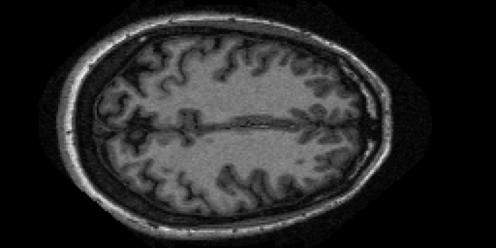

In [4]:
PIL.Image.open(str(non_demented[0]))

In [5]:
print(len(non_demented))
print(len(mild_demented))
print(len(moderate_demented))
print(len(very_mild_demented))

67222
5002
488
13725


In [6]:
non_demented=non_demented[0:488]
mild_demented=mild_demented[0:488]
very_mild_demented=very_mild_demented[0:488]

In [8]:
print(len(non_demented))
print(len(mild_demented))
print(len(moderate_demented))
print(len(very_mild_demented))

488
488
488
488


In [9]:
encoder= OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])


OneHotEncoder()

In [10]:

data = []
result = []
for s in non_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for s in mild_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())
        
for s in moderate_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())

for s in very_mild_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [11]:
X=np.array(data)

In [12]:
y=np.array(result)
y=y.reshape(X.shape[0],4)
y=np.argmax(y, axis=1)
y

array([0, 0, 0, ..., 3, 3, 3])

In [13]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train.shape

(1561, 128, 128, 3)

In [15]:
model=Sequential()

In [16]:
model.add(Conv2D(filters=32,kernel_size=2,padding='Same',input_shape = (128,128,3)))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [17]:
model.add(Conv2D(filters=32,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation='sigmoid'))

In [18]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,518,596 (32.50 MB)

 Trainable params: 8,518,148 (32.49 MB)

 Non-trainable params: 448 (1.75 KB)

None


In [19]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [21]:
history= model.fit(X_train,y_train, validation_split=0.2,epochs=20,callbacks=[early_stopping],batch_size=32)

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 331ms/step - accuracy: 0.3504 - loss: 9.6212 - val_accuracy: 0.2428 - val_loss: 3.0512
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 321ms/step - accuracy: 0.5442 - loss: 1.0642 - val_accuracy: 0.2428 - val_loss: 2.1238
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 326ms/step - accuracy: 0.6619 - loss: 0.7885 - val_accuracy: 0.4153 - val_loss: 1.2960
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 344ms/step - accuracy: 0.7380 - loss: 0.6029 - val_accuracy: 0.7061 - val_loss: 0.7912
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 359ms/step - accuracy: 0.7944 - loss: 0.4825 - val_accuracy: 0.7380 - val_loss: 0.6567
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 362ms/step - accuracy: 0.8168 - loss: 0.4349 - val_accuracy: 0.7061 - val_loss: 0.7491
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 365ms/step - accuracy: 0.8451 - loss: 0.4245 - val_accuracy: 0.7540 - val_loss: 0.6170
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 366ms/step - accuracy: 0.8733 - loss: 0.3224 - val_accu

In [39]:
model.evaluate(X_test,y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8574 - loss: 0.8433
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8574 - loss: 0.8433
Test Loss: 0.6431700587272644
Test Accuracy: 0.8823529481887817


In [33]:
# Define the ResNet-like model
model_resnet = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])

model_resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

# Train the model
history = model_resnet.fit(X_train, y_train, validation_split=0.2, epochs=20, callbacks=[early_stopping], batch_size=32)

# Evaluate the model on test data
y_pred = model_resnet.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
print("Test Accuracy:", accuracy)

Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.2188 - loss: 353.8188 - val_accuracy: 0.2843 - val_loss: 1.3794
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4438 - loss: 1.2894 - val_accuracy: 0.4804 - val_loss: 1.1881
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6551 - loss: 0.8234 - val_accuracy: 0.5686 - val_loss: 1.1087
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7331 - loss: 0.7155 - val_accuracy: 0.6275 - val_loss: 1.1833
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8316 - loss: 0.3713 - val_accuracy: 0.6373 - val_loss: 0.8369
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9398 - loss: 0.1631 - val_accuracy: 0.6863 - val_loss: 0.7751
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9811 - loss: 0.0623 - val_accuracy: 0.6667 - val_loss: 1.3417
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9894 - loss: 0.0364 - val_accuracy: 0.6961 - val_loss: 1.2264
E

In [23]:
model.save('Best_Model.keras')

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, concatenate

def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
    conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
    conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
    pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
    return layer_out

# Define the input layer
inputs = Input(shape=(128, 128, 3))

# Add stem layers
x = Conv2D(64, (7,7), strides=(2,2), padding='same', activation='relu')(inputs)
x = MaxPooling2D((3,3), strides=(2,2), padding='same')(x)
x = Conv2D(192, (3,3), padding='same', activation='relu')(x)
x = MaxPooling2D((3,3), strides=(2,2), padding='same')(x)

# Add inception blocks
x = inception_module(x, 64, 96, 128, 16, 32, 32)
x = inception_module(x, 128, 128, 192, 32, 96, 64)
x = MaxPooling2D((3,3), strides=(2,2), padding='same')(x)
x = inception_module(x, 192, 96, 208, 16, 48, 64)

# Add classification head
x = GlobalAveragePooling2D()(x)
outputs = Dense(4, activation='softmax')(x)

# Create the model
inception_model = Model(inputs, outputs)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Compile the model
inception_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = inception_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

# Evaluate the model on test set
test_loss, test_accuracy = inception_model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - accuracy: 0.2159 - loss: 14.4808 - val_accuracy: 0.2375 - val_loss: 1.4065
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - accuracy: 0.2590 - loss: 1.3919 - val_accuracy: 0.3125 - val_loss: 1.3753
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 0.2762 - loss: 1.3734 - val_accuracy: 0.3375 - val_loss: 1.3647
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.3219 - loss: 1.3579 - val_accuracy: 0.2562 - val_loss: 1.3884
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.3241 - loss: 1.3276 - val_accuracy: 0.3063 - val_loss: 1.3709
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.4042 - loss: 1.2512 - val_accuracy: 0.3313 - val_loss: 1.3287
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.4154 - loss: 1.2319 - val_accuracy: 0.4313 - val_loss: 1.2495
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step - accuracy: 0.4956 - loss: 1.1786 - val_accuracy: 0

In [31]:
import numpy as np
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split

# Assuming you have your X_train, X_test, y_train, y_test data loaded
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the model architecture
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Activation, concatenate

def conv_block(x, growth_rate):
    x1 = BatchNormalization()(x)
    x1 = Activation('relu')(x1)
    x1 = Conv2D(growth_rate*4, (1,1), padding='same')(x1)
    
    x1 = BatchNormalization()(x1)
    x1 = Activation('relu')(x1)
    x1 = Conv2D(growth_rate, (3,3), padding='same')(x1)
    
    x = concatenate([x, x1], axis=-1)
    return x

def dense_block(x, layers, growth_rate):
    for i in range(layers):
        x = conv_block(x, growth_rate)
    return x

def transition_block(x, reduction):
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(int(x.shape[-1] * reduction), (1,1))(x)
    x = MaxPooling2D((2,2), strides=(2,2))(x)
    return x

# Define the input layer
inputs = Input(shape=(128, 128, 3))

# Add stem layers
x = Conv2D(64, (7,7), strides=(2,2), padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3,3), strides=(2,2), padding='same')(x)

# Add dense blocks
x = dense_block(x, 6, 32)
x = transition_block(x, 0.5)
x = dense_block(x, 12, 32)
x = transition_block(x, 0.5)
x = dense_block(x, 24, 32)
x = transition_block(x, 0.5)
x = dense_block(x, 16, 32)

# Add classification head
x = GlobalAveragePooling2D()(x)
outputs = Dense(4, activation='softmax')(x)

# Create the model
model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.2704 - loss: 4.3885 - val_accuracy: 0.2500 - val_loss: 429.5393
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4661 - loss: 1.2903 - val_accuracy: 0.2969 - val_loss: 29.8199
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6275 - loss: 0.9650 - val_accuracy: 0.1797 - val_loss: 17.3132
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7077 - loss: 0.7195 - val_accuracy: 0.2500 - val_loss: 14.4493
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7651 - loss: 0.5599 - val_accuracy: 0.2500 - val_loss: 20.7761
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8102 - loss: 0.4550 - val_accuracy: 0.2812 - val_loss: 7.9085
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8169 - loss: 0.5324 - val_accuracy: 0.3047 - val_loss: 4.6264
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8627 - loss: 0.4051 - val_accuracy: 0.2734 - val